# Fifa 19 Dataset - Transfer Value predicting Regression Model

<img src="fifa.jpeg" style="float:left">

# Importing required Packages

In [9]:

import numpy as np
import pandas as pd

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from mosaicml import *
from mosaicml.constants import MLModelFlavours

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [10]:
# Load the data
from connector.mosaicio import MosaicioConnector
ioConnector = MosaicioConnector()

ioConnector.download("fifa.csv")
data = pd.read_csv("/data/fifa.csv")
data.head(10)

,short_name,nationality,overall,potential,wage_eur,value_eur,age,height_cm,weight_kg,attacking_crossing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Argentina,94,94,565000,95500000,32,170,72,88,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,Portugal,93,93,405000,58500000,34,187,83,84,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,Brazil,92,92,290000,105500000,27,175,68,87,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,Slovenia,91,93,125000,77500000,26,188,87,13,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,Belgium,91,91,470000,90000000,28,175,74,81,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,Belgium,91,91,370000,90000000,28,181,70,93,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,Germany,90,93,250000,67500000,27,187,85,18,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,Netherlands,90,91,200000,78000000,27,193,92,53,...,62,89,91,92,85,13,10,13,11,11
8,L. Modric,Croatia,90,90,340000,45000000,33,172,66,86,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,Egypt,90,90,240000,80500000,27,175,71,79,...,77,91,38,43,41,14,14,9,11,14


# Seperating Dataset into Training and Test

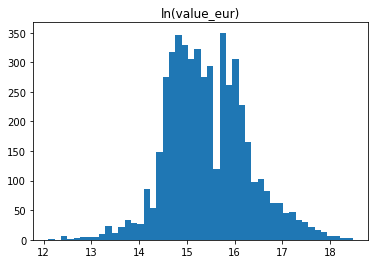

In [11]:
X = data[['age','height_cm','weight_kg','skill_dribbling','attacking_crossing','attacking_finishing','movement_acceleration','movement_sprint_speed','power_shot_power','mentality_aggression','defending_marking','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling','overall','potential']]
y = data['value_eur']
ylog = np.log(y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(ylog, bins='auto')
plt.title("ln(value_eur)")
plt.show()

X_train, X_test, ylog_train, ylog_test, y_train, y_test = train_test_split(X, ylog, y, test_size=0.25, random_state=4)

# Training the Model

In [12]:
from sklearn.ensemble import RandomForestRegressor
gbm_default = RandomForestRegressor()
gbm_default.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Defining a Score Function

In [13]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data_list = payload
    data_array = np.asarray(data_list)
    try:
        prediction = model.predict(data_array)
    except:
        prediction = model.predict(data_array.reshape(1, -1))
    return prediction.tolist()


# Testing Score Function

In [14]:
# to verify if score func works

import requests
req = requests.Request()
req.json = {"payload":X_test}

'''
Reference Sample Payload 

req.json = {"payload": [ 25, 185,  88,  78,  65,  81,  77,  75,  81,  63,  37,  26,   9,
        10,  79,  82]}
        
'''
score(gbm_default, req)

[7150000.0,
 4870000.0,
 22900000.0,
 18150000.0,
 2350000.0,
 4740000.0,
 17200000.0,
 705000.0,
 5500000.0,
 2780000.0,
 2870000.0,
 3820000.0,
 4090000.0,
 8000000.0,
 4740000.0,
 17200000.0,
 3240000.0,
 7500000.0,
 2990000.0,
 10500000.0,
 2190000.0,
 2470000.0,
 1400000.0,
 8000000.0,
 4680000.0,
 9050000.0,
 40450000.0,
 10650000.0,
 10450000.0,
 637500.0,
 4890000.0,
 4080000.0,
 2520000.0,
 17400000.0,
 5750000.0,
 2350000.0,
 6400000.0,
 8500000.0,
 1280000.0,
 4620000.0,
 3040000.0,
 2160000.0,
 1970000.0,
 7900000.0,
 1890000.0,
 1880000.0,
 3870000.0,
 2320000.0,
 7000000.0,
 6600000.0,
 17500000.0,
 2110000.0,
 2180000.0,
 7150000.0,
 1530000.0,
 3250000.0,
 5490000.0,
 2180000.0,
 5500000.0,
 2470000.0,
 832500.0,
 18650000.0,
 1650000.0,
 2110000.0,
 2730000.0,
 7550000.0,
 6350000.0,
 26100000.0,
 10300000.0,
 12400000.0,
 8000000.0,
 3860000.0,
 6650000.0,
 3810000.0,
 26800000.0,
 2380000.0,
 8550000.0,
 1770000.0,
 7250000.0,
 1980000.0,
 4450000.0,
 1470000.0,
 165

# Calculating Y_true and Y_pred

In [15]:
Y_true = y_test

Y_pred = gbm_default.predict(X_test)
features = list(X_train)

# Registering the Model

In [16]:
register_model(
    gbm_default,
    score,
    "fifa_model",
    "fifa_regression",
    MLModelFlavours.sklearn,
    init_script="mkdir abc \\n cd abc \\n touch abc.txt",
    input_type="json",
    explain_ai=True,
    x_train=X_train, 
    y_train=y_train, 
    y_true=Y_true,
    y_pred=Y_pred,
    feature_names=features,
    feature_ids=features,
    target_names=["Value"],
    model_type="regression"
)

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


2021-01-12 10:31:19,009 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:19,413 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:19,415 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[25/25] grid cells ████████████████████ Time elapsed: 0 seconds

2021-01-12 10:31:20,720 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:21,037 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:21,039 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[22/22] grid cells ████████████████████ Time elapsed: 0 seconds

2021-01-12 10:31:22,293 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:22,613 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:22,615 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[22/22] grid cells ████████████████████ Time elapsed: 0 seconds

2021-01-12 10:31:23,831 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:24,166 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:24,167 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[27/27] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:25,575 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:25,890 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:25,892 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:27,428 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:27,737 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:27,739 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:29,247 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:29,559 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:29,560 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:31,087 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:31,388 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:31,390 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:32,911 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:33,235 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:33,237 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[27/27] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:34,630 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:34,940 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:34,942 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:36,455 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:36,764 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:36,766 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:38,267 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:38,578 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:38,580 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[28/28] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:40,075 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:40,393 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:40,395 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[13/13] grid cells ████████████████████ Time elapsed: 0 seconds

2021-01-12 10:31:41,306 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:41,624 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:41,626 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[13/13] grid cells ████████████████████ Time elapsed: 0 seconds

2021-01-12 10:31:42,539 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:42,842 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:42,844 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[24/24] grid cells ████████████████████ Time elapsed: 0 seconds

2021-01-12 10:31:44,145 - skater.core.explanations - WARNING - Classifiers with probability scores can be explained 
more granularly than those without scores. If a prediction method with 
scores is available, use that instead.
2021-01-12 10:31:44,458 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2021-01-12 10:31:44,460 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[26/26] grid cells ████████████████████ Time elapsed: 1 seconds

2021-01-12 10:31:45,888 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2021-01-12 10:31:45,890 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[16/16] features ████████████████████ Time elapsed: 3 seconds

2021-01-12 10:31:49,786 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2021-01-12 10:31:49,936 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used f1-score
2021-01-12 10:31:49,942 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 0.02613256848045944
2021-01-12 10:31:51,204 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [10, 12, 14, 16, 17, 18, 19, 22, 26, 30, 32, 34, 36, 38, 44, 50, 56, 57, 58, 64, 66, 68, 98, 99, 102, 104, 106, 108, 109, 111, 114, 115, 123, 124, 128]
2021-01-12 10:31:51,214 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (3750,)
2021-01-12 10:31:51,230 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.016; oracle score 0.334
2021-01-12 10:31:51,231 - skater.core.global_interpretation.tree_surrogate

Surrogate Explainer could not be generated for this model
list index out of range


{'created_by': 'devesh.surve@lntinfotech.com',
 'created_on': '2021-01-12T07:13:34+00:00',
 'deploymentstatus': True,
 'description': 'fifa_regression',
 'flavour': 'sklearn',
 'id': '3a0111cd-07d7-46ab-bc0d-d169c8f3e846',
 'last_modified_by': 'devesh.surve@lntinfotech.com',
 'last_modified_on': '2021-01-12T07:13:34+00:00',
 'name': 'fifa_model',
 'project_id': '35ada3e3-00f5-4ad8-a462-58269dd03a9f',
 'type': 'model',
 'versions': [{'created_by': 'devesh.surve@lntinfotech.com',
   'created_on': '2021-01-12T10:31:16+00:00',
   'datasource_name': '',
   'deploy_info': None,
   'deployments': [],
   'description': None,
   'docker_image_url': 'registry.lti-aiq.in:443/mosaic-ai-logistics/mosaic-ai-serving:1.0.0-30092020',
   'gpu_docker_image_url': 'registry.lti-aiq.in:443/mosaic-ai-logistics/mosaic-ai-serving:gpu-1.0.0-29102020',
   'id': '10477031-65cf-4521-894d-8a81010b3063',
   'init_script': '"pip install --user absl-py==0.11.0\\n pip install --user alembic==1.4.3\\n pip install --use